# SD-TSIA210 Machine Learning Project
## Regression
by Celine Beyrouthy, Bourhan Derknaya, Sahar Kiameh, Karim Reda.


In [ ]:
from google.colab import files
uploaded = files.upload()

Saving Real estate valuation data set.xlsx to Real estate valuation data set (1).xlsx


In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn import preprocessing, utils
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression, LassoCV, RidgeCV
from sklearn.svm import SVR, LinearSVR
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.model_selection import cross_val_score

In [ ]:
df = pd.read_excel('Real estate valuation data set.xlsx')

In [ ]:
df.head()

,No,X1 transaction date,X2 house age,X3 distance to the nearest MRT station,X4 number of convenience stores,X5 latitude,X6 longitude,Y house price of unit area
0,1,2012.916667,32.0,84.87882,10,24.98298,121.54024,37.9
1,2,2012.916667,19.5,306.59470,9,24.98034,121.53951,42.2
2,3,2013.583333,13.3,561.98450,5,24.98746,121.54391,47.3
3,4,2013.500000,13.3,561.98450,5,24.98746,121.54391,54.8
4,5,2012.833333,5.0,390.56840,5,24.97937,121.54245,43.1


In [ ]:
for i in (df.columns):
  print(i)

No
X1 transaction date
X2 house age
X3 distance to the nearest MRT station
X4 number of convenience stores
X5 latitude
X6 longitude
Y house price of unit area


In [ ]:
df.drop(['No'], axis = 1).describe()

,X1 transaction date,X2 house age,X3 distance to the nearest MRT station,X4 number of convenience stores,X5 latitude,X6 longitude,Y house price of unit area
count,414.000000,414.000000,414.000000,414.000000,414.000000,414.000000,414.000000
mean,2013.148953,17.712560,1083.885689,4.094203,24.969030,121.533361,37.980193
std,0.281995,11.392485,1262.109595,2.945562,0.012410,0.015347,13.606488
min,2012.666667,0.000000,23.382840,0.000000,24.932070,121.473530,7.600000
25%,2012.916667,9.025000,289.324800,1.000000,24.963000,121.528085,27.700000
50%,2013.166667,16.100000,492.231300,4.000000,24.971100,121.538630,38.450000
75%,2013.416667,28.150000,1454.279000,6.000000,24.977455,121.543305,46.600000
max,2013.583333,43.800000,6488.021000,10.000000,25.014590,121.566270,117.500000


# Distribution of the Variables

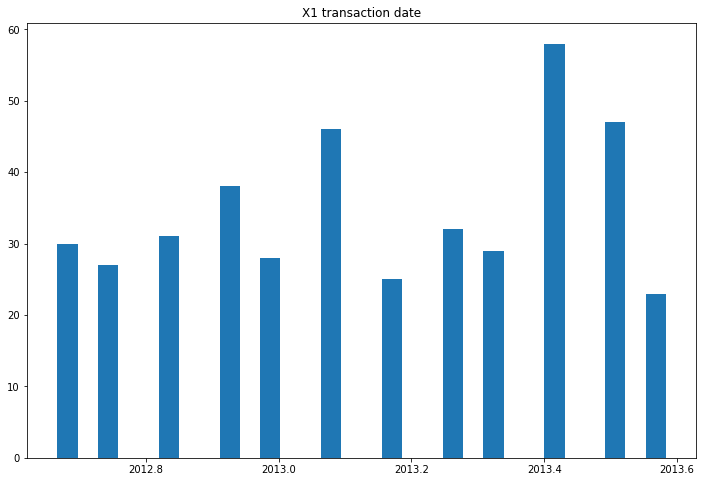

In [ ]:
# Visualise X1 transaction date
plt.figure(figsize=(12,8))
plt.hist(df['X1 transaction date'], bins=30)
plt.title('X1 transaction date')
plt.show()

The number of transactions had a peak in May 2013.

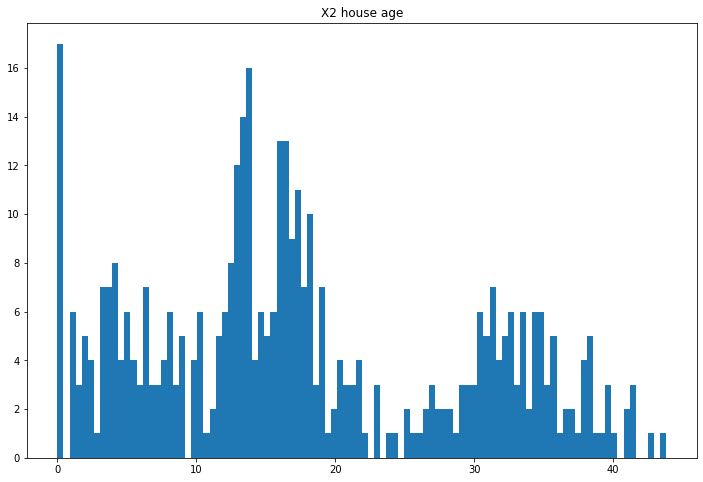

In [ ]:
# Visualise X2 house age
plt.figure(figsize=(12,8))
plt.hist(df['X2 house age'], bins=100)
plt.title('X2 house age')
plt.show()

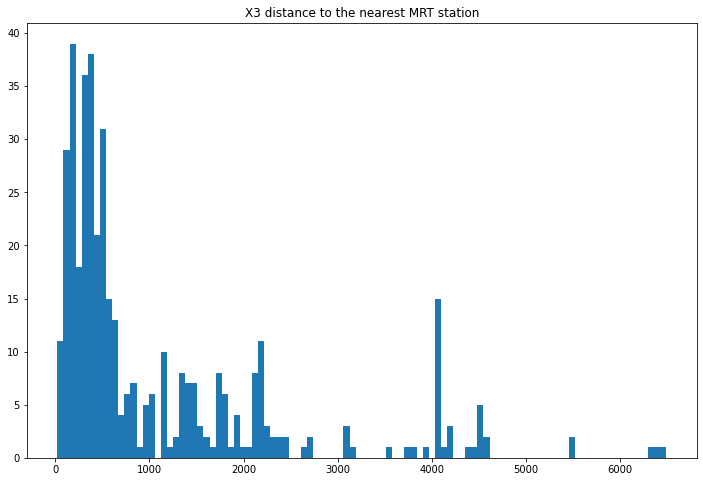

In [ ]:
# Visualise X3 distance to the nearest MRT station
plt.figure(figsize=(12,8))
plt.hist(df['X3 distance to the nearest MRT station'], bins=100)
plt.title('X3 distance to the nearest MRT station')
plt.show()

Most houses are located within 1 km of the nearest MRT station.

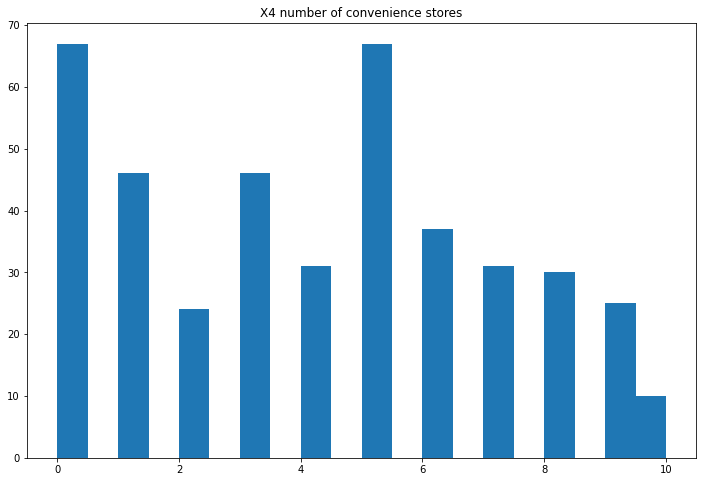

In [ ]:
# Visualise X4 number of convenience stores
plt.figure(figsize=(12,8))
plt.hist(df['X4 number of convenience stores'], bins=20)
plt.title('X4 number of convenience stores')
plt.show()

67 out of 414 houses don't have any convenience store in the living circle on foot. Which means that approximately 16% of the instances we have in our dataset are probably located in residential areas.

More than 50% of the houses have between 1 and 6 convenience stores in the living circle on foot.

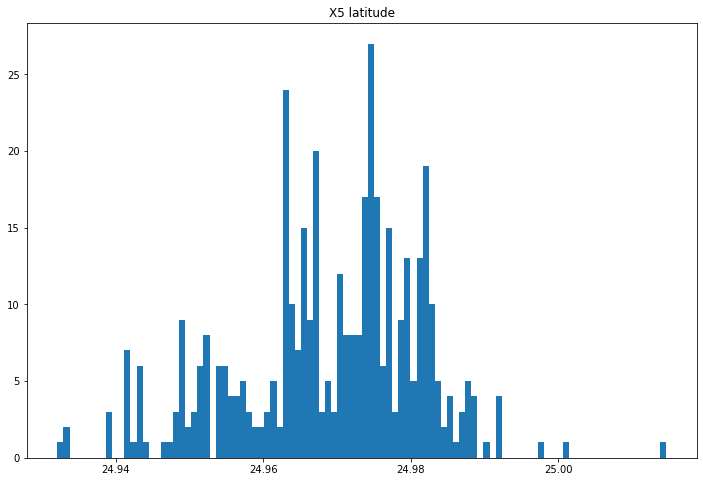

In [ ]:
# Visualise X5 latitude
plt.figure(figsize=(12,8))
plt.hist(df['X5 latitude'], bins=100)
plt.title('X5 latitude')
plt.show()

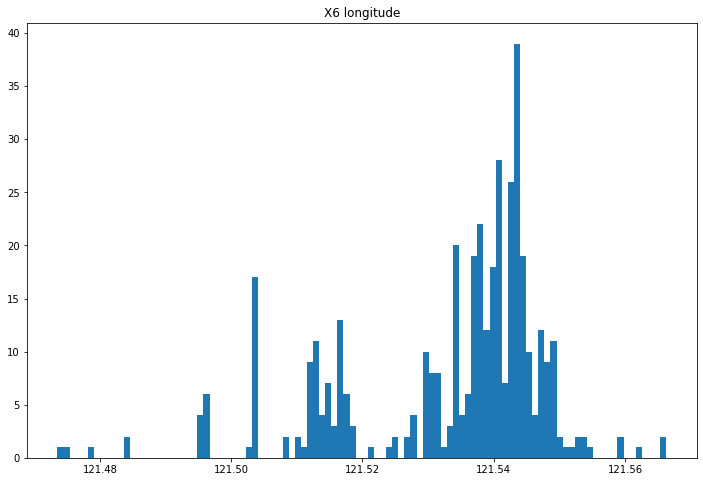

In [ ]:
# Visualise X6 longitude
plt.figure(figsize=(12,8))
plt.hist(df['X6 longitude'], bins=100)
plt.title('X6 longitude')
plt.show()

By visualising the distribution of the latitude and longitude variables, we can say that most houses are located in the East central part of the area. 
We can verify this by using the geographical distribution on a map.

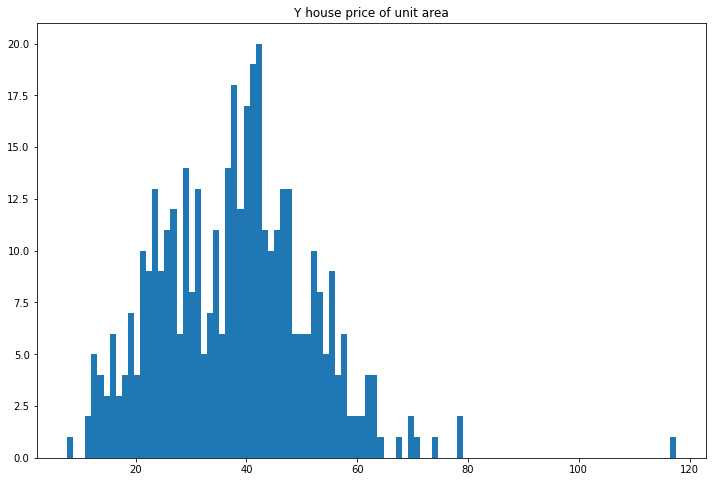

In [ ]:
# Visualise Y house price of unit area
plt.figure(figsize=(12,8))
plt.hist(df['Y house price of unit area'], bins=100)
plt.title('Y house price of unit area')
plt.show()

House price of unit varies greatly from 76,000 New Taiwan Dollar/Ping to more than 1 million New Taiwan Dollar/Ping.
More than half of house prices of unit area are between 250,000 and 500,000 New Taiwan Dollar/Ping.
There are 8 houses for which the house price of unit area is more than 650,000 New Taiwan Dollar/Ping, with one being 1,115,000 New Taiwan Dollar/Ping (extreme value).

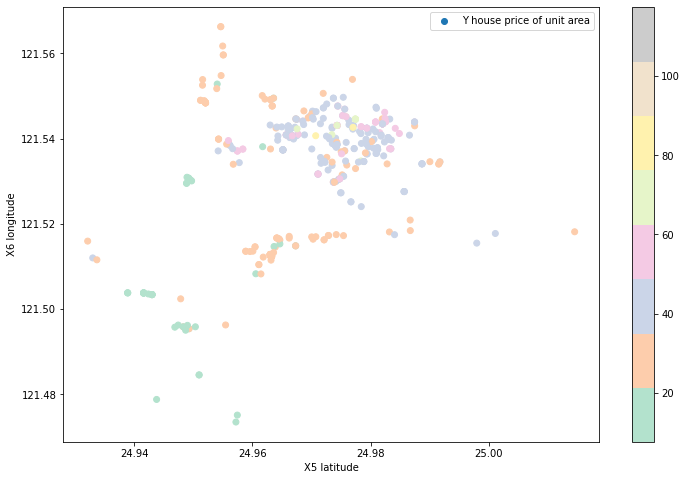

In [ ]:
# Visualize the geographical distribution of the house prices of unit area with respect to X5 latitude and X6 longitude
plt.figure(figsize=(12,8))
plt.scatter(df['X5 latitude'], df['X6 longitude'], label = 'Y house price of unit area', c=df['Y house price of unit area'], cmap='Pastel2')
plt.xlabel('X5 latitude')
plt.ylabel('X6 longitude')
plt.colorbar()
plt.legend()
plt.show()

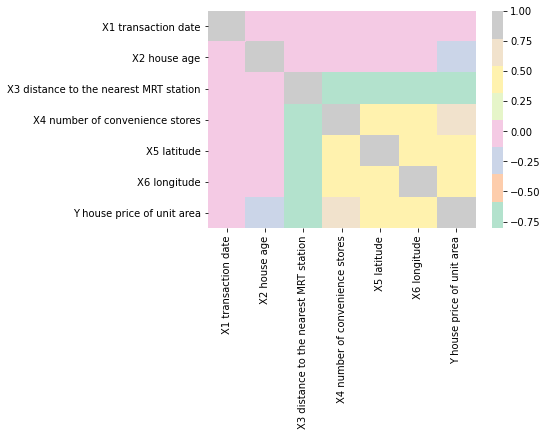

In [ ]:
corr = df.drop(['No'],axis = 1).corr()
sns.heatmap(corr, cmap='Pastel2')

X3 distance to the nearest MRT station is highly negatively correlated to X4 number of convenience stores, X5 latitude, X6 longitude and Y house price of unit area. This result is very reasonable since the closer the house is located from the MRT station, the higher its price. Same reasoning for the number of convenience stores.

In [ ]:
y = df['Y house price of unit area']
X = df.drop(['No','Y house price of unit area'], axis = 1)

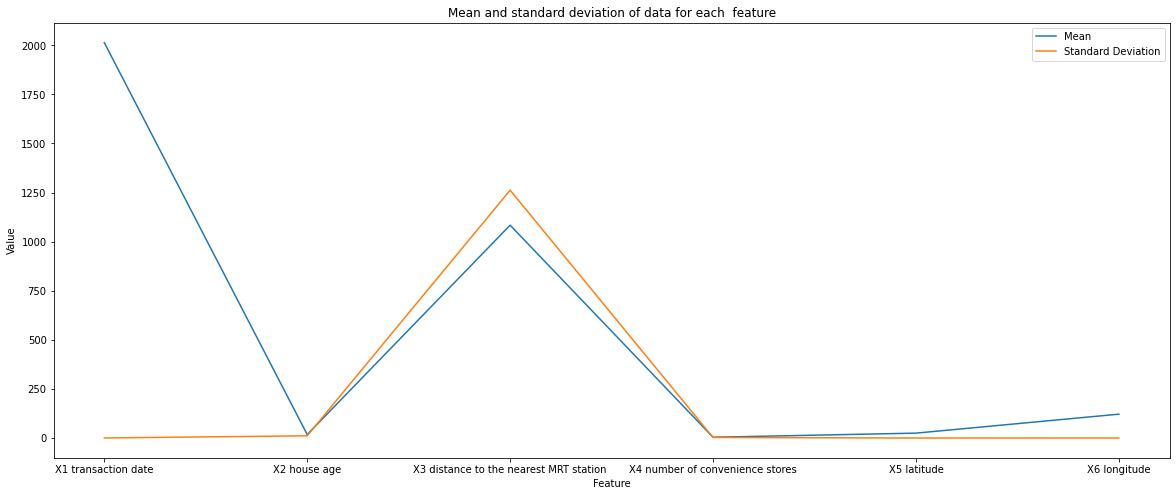

In [ ]:
plt.figure(figsize=(20,8))

plt.plot(X.mean(axis=0), label='Mean')
plt.plot(X.std(axis=0), label='Standard Deviation')

plt.title('Mean and standard deviation of data for each  feature')
plt.xlabel('Feature')
plt.ylabel('Value')
plt.legend()
plt.show()

We notice that the data isn't scaled, so we will have to scale it in order to apply regression algorithms.

In [ ]:
X_scaled = preprocessing.StandardScaler().fit_transform(X)

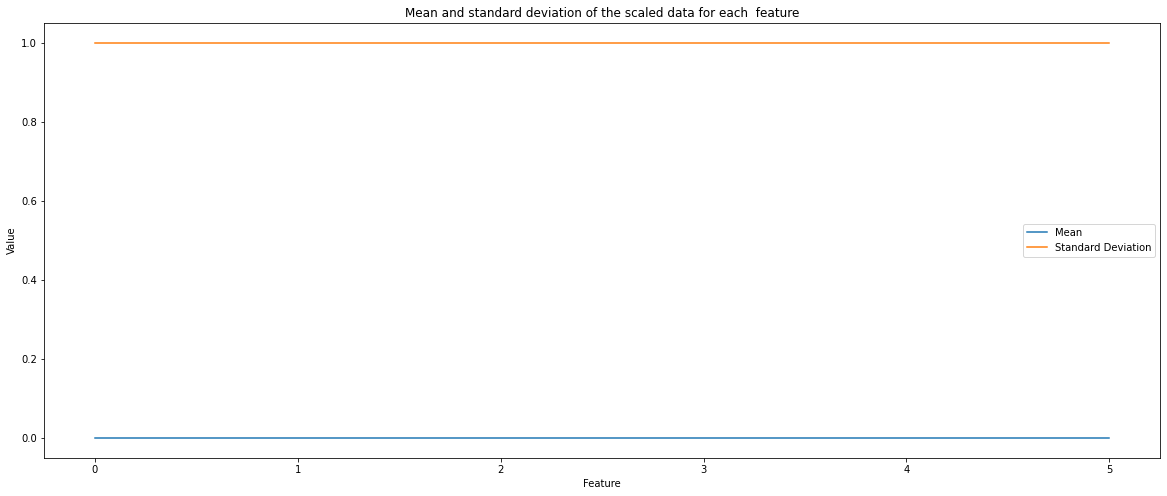

In [ ]:
plt.figure(figsize=(20,8))

plt.plot(X_scaled.mean(axis=0), label='Mean')
plt.plot(X_scaled.std(axis=0), label='Standard Deviation')

plt.title('Mean and standard deviation of the scaled data for each  feature')
plt.xlabel('Feature')
plt.ylabel('Value')
plt.legend()
plt.show()

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size = 0.25, random_state = 42)

In [ ]:
scores = pd.DataFrame()

## Linear Regression

In [ ]:
lin_reg = LinearRegression()
lin_reg.fit(X_train, y_train)

print("Using sklearn's linear_model we obtain:\n")
print('The estimated parameters are:')
for i in range(len(X.columns)):
    print('coefficient for {} = {:.4f}'.format(X.columns[i],lin_reg.coef_[i]))

Using sklearn's linear_model we obtain:

The estimated parameters are:
coefficient for X1 transaction date = 1.6582
coefficient for X2 house age = -3.0358
coefficient for X3 distance to the nearest MRT station = -6.2874
coefficient for X4 number of convenience stores = 3.3197
coefficient for X5 latitude = 2.7196
coefficient for X6 longitude = -0.6613


The distance to the nearest MRT is the variable that affects the most our dependent variable y = house price of unit area. In fact, a 1 unit increase in distance leads to 6 units decrease in house price.

In [ ]:
y_pred = lin_reg.predict(X_test)
R2_train = lin_reg.score(X_train, y_train)
R2_test = lin_reg.score(X_test, y_test)
MSE_test = mean_squared_error(y_test, y_pred)

print('\nDetermination coefficient R^2 on the train set = {:.4f}.'.format(R2_train))
print('\nDetermination coefficient R^2 on the test set = {:.4f}.'.format(R2_test))

print('\nMean Squared Error on the test set = {:.4f}.'.format(MSE_test))


Determination coefficient R^2 on the train set = 0.5763.

Determination coefficient R^2 on the test set = 0.5797.

Mean Squared Error on the test set = 66.6713.


In [ ]:
d = {'Regression': "Linear Regression", 'R2_train': R2_train, 'R2_test': R2_test, 'MSE_test': MSE_test}
row = pd.DataFrame(d, index=[1])
scores = scores.append(row)
scores

,Regression,R2_train,R2_test,MSE_test
1,Linear Regression,0.576348,0.579676,66.671276


## SVR with Linear Kernel

In [ ]:
svr = SVR(kernel='linear')
svr.fit(X_train, y_train)

print("Using sklearn's linear_model we obtain:\n")
print('The estimated parameters are:')

for i in range(len(X.columns)):
    print('coefficient for {} = {:.4f}'.format(X.columns[i], svr.coef_[0][i]))

Using sklearn's linear_model we obtain:

The estimated parameters are:
coefficient for X1 transaction date = 0.8137
coefficient for X2 house age = -3.2476
coefficient for X3 distance to the nearest MRT station = -4.5728
coefficient for X4 number of convenience stores = 3.7041
coefficient for X5 latitude = 3.3603
coefficient for X6 longitude = -0.3775


The distance to the nearest MRT is also the variable that affects the most our dependent variable y = house price of unit area. However its effect has decreased: a 1 unit increase in distance leads to 4.5 units decrease in house price.

In [ ]:
y_pred = svr.predict(X_test)
R2_train = svr.score(X_train, y_train)
R2_test = svr.score(X_test, y_test)
MSE_test = mean_squared_error(y_test, y_pred)

print('\nDetermination coefficient R^2 on the train set = {:.4f}.'.format(R2_train))
print('\nDetermination coefficient R^2 on the test set = {:.4f}.'.format(R2_test))

print('\nMean Squared Error on the test set = {:.4f}.'.format(MSE_test))


Determination coefficient R^2 on the train set = 0.5575.

Determination coefficient R^2 on the test set = 0.5970.

Mean Squared Error on the test set = 63.9181.


In [ ]:
d = {'Regression': "SVR with linear kernel", 'R2_train': R2_train, 'R2_test': R2_test, 'MSE_test': MSE_test}
row = pd.DataFrame(d, index=[2])
scores = scores.append(row)
scores

,Regression,R2_train,R2_test,MSE_test
1,Linear Regression,0.576348,0.579676,66.671276
2,SVR with linear kernel,0.557472,0.597033,63.918076


## Linear SVR

In [ ]:
lin_svr = LinearSVR(random_state=42)
lin_svr.fit(X_train, y_train) 

print("Using sklearn's linear_model we obtain the below coefficients with {} iterations :\n".format(lin_svr.n_iter_))
for i in range(len(X.columns)):
    print('coefficient for {} = {:.4f}'.format(X.columns[i],lin_svr.coef_[i]))

Using sklearn's linear_model we obtain the below coefficients with 162 iterations :

coefficient for X1 transaction date = 0.5325
coefficient for X2 house age = -3.1329
coefficient for X3 distance to the nearest MRT station = -4.5898
coefficient for X4 number of convenience stores = 4.0118
coefficient for X5 latitude = 2.8427
coefficient for X6 longitude = 0.0909


We notice here an increase in the impact of the number of convenience stores over the house price of unit area. 

In [ ]:
y_pred = lin_svr.predict(X_test)
R2_train = lin_svr.score(X_train, y_train)
R2_test = lin_svr.score(X_test, y_test)
MSE_test = mean_squared_error(y_test, y_pred)

print('\nDetermination coefficient R^2 on the train set = {:.4f}.'.format(R2_train))
print('\nDetermination coefficient R^2 on the test set = {:.4f}.'.format(R2_test))

print('\nMean Squared Error on the test set = {:.4f}.'.format(MSE_test))


Determination coefficient R^2 on the train set = 0.5332.

Determination coefficient R^2 on the test set = 0.5917.

Mean Squared Error on the test set = 64.7634.


In [ ]:
d = {'Regression': "Linear SVR", 'R2_train': R2_train, 'R2_test': R2_test, 'MSE_test': MSE_test}
row = pd.DataFrame(d, index=[3])
scores = scores.append(row)
scores

,Regression,R2_train,R2_test,MSE_test
1,Linear Regression,0.576348,0.579676,66.671276
2,SVR with linear kernel,0.557472,0.597033,63.918076
3,Linear SVR,0.533213,0.591704,64.763350


The previous linear regression and linear SVR have shown close training and testing scores, which means that the regression is coherent and does not overfit. However, it is notable that the scores are average which shows that we can reach better predictions on the labels by improving the model.


## SVR with RBF Kernel

In [ ]:
rbfsvr = SVR()
rbfsvr.fit(X_train, y_train)

y_pred = rbfsvr.predict(X_test)
R2_train = rbfsvr.score(X_train, y_train)
R2_test = rbfsvr.score(X_test, y_test)
MSE_test = mean_squared_error(y_test, y_pred)

print('\nDetermination coefficient R^2 on the train set = {:.4f}.'.format(R2_train))
print('\nDetermination coefficient R^2 on the test set = {:.4f}.'.format(R2_test))

print('\nMean Squared Error on the test set = {:.4f}.'.format(MSE_test))


Determination coefficient R^2 on the train set = 0.5727.

Determination coefficient R^2 on the test set = 0.6099.

Mean Squared Error on the test set = 61.8781.


In [ ]:
d = {'Regression': "SVR with RBF kernel", 'R2_train': R2_train, 'R2_test': R2_test, 'MSE_test': MSE_test}
row = pd.DataFrame(d, index=[4])
scores = scores.append(row)
scores

,Regression,R2_train,R2_test,MSE_test
1,Linear Regression,0.576348,0.579676,66.671276
2,SVR with linear kernel,0.557472,0.597033,63.918076
3,Linear SVR,0.533213,0.591704,64.763350
4,SVR with RBF kernel,0.572733,0.609894,61.878137


### Decision Tree Regressor

In [ ]:
dt = DecisionTreeRegressor(criterion='mse',random_state=42)
dt.fit(X_train, y_train)

y_pred = dt.predict(X_test)
R2_train = dt.score(X_train, y_train)
R2_test = dt.score(X_test, y_test)
MSE_test = mean_squared_error(y_test, y_pred)

print('\nDetermination coefficient R^2 on the train set = {:.4f}.'.format(R2_train))
print('\nDetermination coefficient R^2 on the test set = {:.4f}.'.format(R2_test))

print('\nMean Squared Error on the test set = {:.4f}.'.format(MSE_test))


Determination coefficient R^2 on the train set = 0.9975.

Determination coefficient R^2 on the test set = 0.5740.

Mean Squared Error on the test set = 67.5659.


In [ ]:
d = {'Regression': "Decision Tree Regression", 'R2_train': R2_train, 'R2_test': R2_test, 'MSE_test': MSE_test}
row = pd.DataFrame(d, index=[5])
scores = scores.append(row)
scores

,Regression,R2_train,R2_test,MSE_test
1,Linear Regression,0.576348,0.579676,66.671276
2,SVR with linear kernel,0.557472,0.597033,63.918076
3,Linear SVR,0.533213,0.591704,64.763350
4,SVR with RBF kernel,0.572733,0.609894,61.878137
5,Decision Tree Regression,0.997488,0.574036,67.565865


For the decision tree classifier, the determination coefficient on the train set is way higher than the one on the test set which means that our model is overfitting on the train set. In fact, the training determination coefficient is almost equal to 1 which could suggest that a more refined modeling approach is needed for a better prediction.

### Random Forest

In [ ]:
rf = RandomForestRegressor(random_state=42)
rf.fit(X_train, y_train)
y_pred = rf.predict(X_test)
R2_train = rf.score(X_train, y_train)
R2_test = rf.score(X_test, y_test)
MSE_test = mean_squared_error(y_test, y_pred)

print('\nDetermination coefficient R^2 on the train set = {:.4f}.'.format(R2_train))
print('\nDetermination coefficient R^2 on the test set = {:.4f}.'.format(R2_test))

print('\nMean Squared Error on the test set = {:.4f}.'.format(MSE_test))


Determination coefficient R^2 on the train set = 0.9476.

Determination coefficient R^2 on the test set = 0.7314.

Mean Squared Error on the test set = 42.6017.


In [ ]:
d = {'Regression': "Random Forest Regression", 'R2_train': R2_train, 'R2_test': R2_test, 'MSE_test': MSE_test}
row = pd.DataFrame(d, index=[6])
scores = scores.append(row)
scores

,Regression,R2_train,R2_test,MSE_test
1,Linear Regression,0.576348,0.579676,66.671276
2,SVR with linear kernel,0.557472,0.597033,63.918076
3,Linear SVR,0.533213,0.591704,64.763350
4,SVR with RBF kernel,0.572733,0.609894,61.878137
5,Decision Tree Regression,0.997488,0.574036,67.565865
6,Random Forest Regression,0.947573,0.731421,42.601660


## Lasso Regression

In [ ]:
n_alphas = 30
lasso_reg = LassoCV(alphas=np.logspace(
    10e-3, 10e1, n_alphas)).fit(X_train, y_train)

y_pred = lasso_reg.predict(X_test)

R2_train = lasso_reg.score(X_train, y_train)
R2_test = lasso_reg.score(X_test, y_test)
MSE_test = mean_squared_error(y_test, y_pred)

print('\nDetermination coefficient R^2 on the train set = {:.4f}.'.format(R2_train))
print('\nDetermination coefficient R^2 on the test set = {:.4f}.'.format(R2_test))
print('\nThe Mean Squared Error MSE = {:.4f}.\n'.format(MSE_test))


Determination coefficient R^2 on the train set = 0.5556.

Determination coefficient R^2 on the test set = 0.5747.

The Mean Squared Error MSE = 67.4595.



In [ ]:
d = {'Regression': "Lasso Regression", 'R2_train': R2_train, 'R2_test': R2_test, 'MSE_test': MSE_test}
row = pd.DataFrame(d, index=[7])
scores = scores.append(row)

In [ ]:
scores

,Regression,R2_train,R2_test,MSE_test
1,Linear Regression,0.576348,0.579676,66.671276
2,SVR with linear kernel,0.557472,0.597033,63.918076
3,Linear SVR,0.533213,0.591704,64.763350
4,SVR with RBF kernel,0.572733,0.609894,61.878137
5,Decision Tree Regression,0.997488,0.574036,67.565865
6,Random Forest Regression,0.947573,0.731421,42.601660
7,Lasso Regression,0.555650,0.574706,67.459490


## Comparison and Conclusion

The accuracy and performance levels of the **random forest regression** proves to be the best one among all other regressions. It presents the lowest MSE (42.6) and highest determination coefficient R2 on test set (0.73) without overfitting on the training dataset (0.95).

For the decicion tree regression, we notice an overfitting because the model doesn't correctly predict the new test set.

The other regression models have almost the same accuracy and performace levels.In fact, the highest determination coefficient on the train and test sets reached 0.6 which is not accurate enough.